# IMDB Movie - Exploratory Data Analysis

Question: How can we rate a movie before it is officially released in theatre? <br> Many use their instincts to judge the quality of a film while others rely on critics. 

The dataset includes over 5000 movies which span across 100 years and 66 countries.


Let's explore the data.

### Data Exploration

In [1]:
# import pandas to use its primary data structure
import pandas as pd

path = "movie_metadata.csv"
df = pd.read_csv(path)

print(df.shape)
df.head(10)

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


There are 28 different variables and 5043 movies in this dataset.

#### Duration vs Imdb Rating

Let's see the relationship between **duration** and the IMDB rating **imdb_score** 

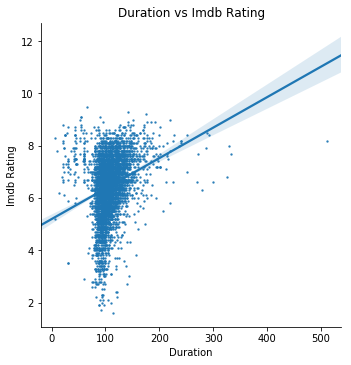

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
s = sns.lmplot(x='duration', y='imdb_score',data=df, fit_reg=True,scatter_kws={'s':2})
plt.title('Duration vs Imdb Rating')
plt.xlabel('Duration')
plt.ylabel('Imdb Rating')
plt.show()

Duration has a positive correlation with Imdb rating which means that a longer movie generally has a better rating. However this correlation is relatively moderate as we can see that most of the films is around 90 to 120 minutes long.

**Number of human faces in poster vs Rating**
<br> <br> Let's see the relationship between **facenumber_in_poster** and the IMDB rating **imdb_score**

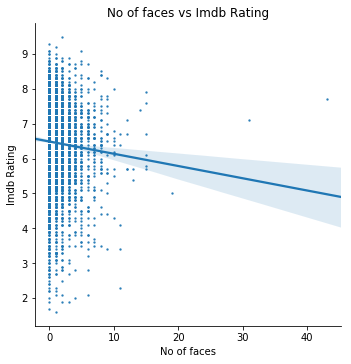

In [3]:
s = sns.lmplot(x='facenumber_in_poster', y='imdb_score',data=df, fit_reg=True,scatter_kws={'s':2})
plt.title('No of faces vs Imdb Rating')
plt.xlabel('No of faces')
plt.ylabel('Imdb Rating')

plt.show()

The more faces in the poster, the lower the rating is. Most of the posters have no face as we can see the histogram below.

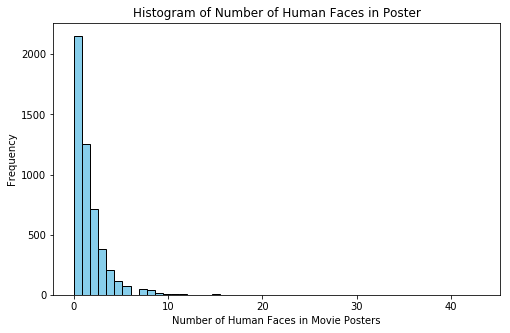

In [16]:
df['facenumber_in_poster'].plot(kind='hist', figsize=(8, 5), edgecolor='black', color = 'skyblue', bins = 50)
plt.title('Histogram of Number of Human Faces in Poster') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel('Number of Human Faces in Movie Posters') # add x-label
plt.show()

**Let's see histogram of IMDB rating**

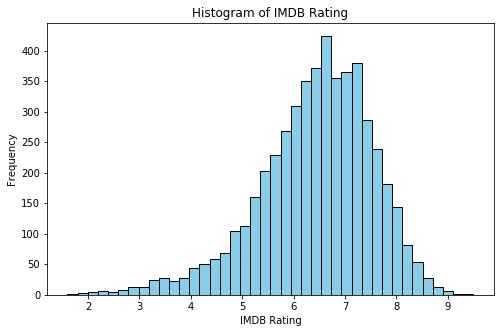

In [5]:
df['imdb_score'].plot(kind='hist', figsize=(8, 5), subplots = True, bins = 40, edgecolor='black', color = 'skyblue')
plt.title('Histogram of IMDB Rating') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel('IMDB Rating') # add x-label
plt.show()

Films with rating higher than 8.0 are in the IMDB top 250, they are great movies. Films with rating from 7.0 to 8.0 are good ones, people can get some perspectives from them, while movies with rating from 1 to 5 are generally considered as bad. 

**IMDB Rating VS Country**

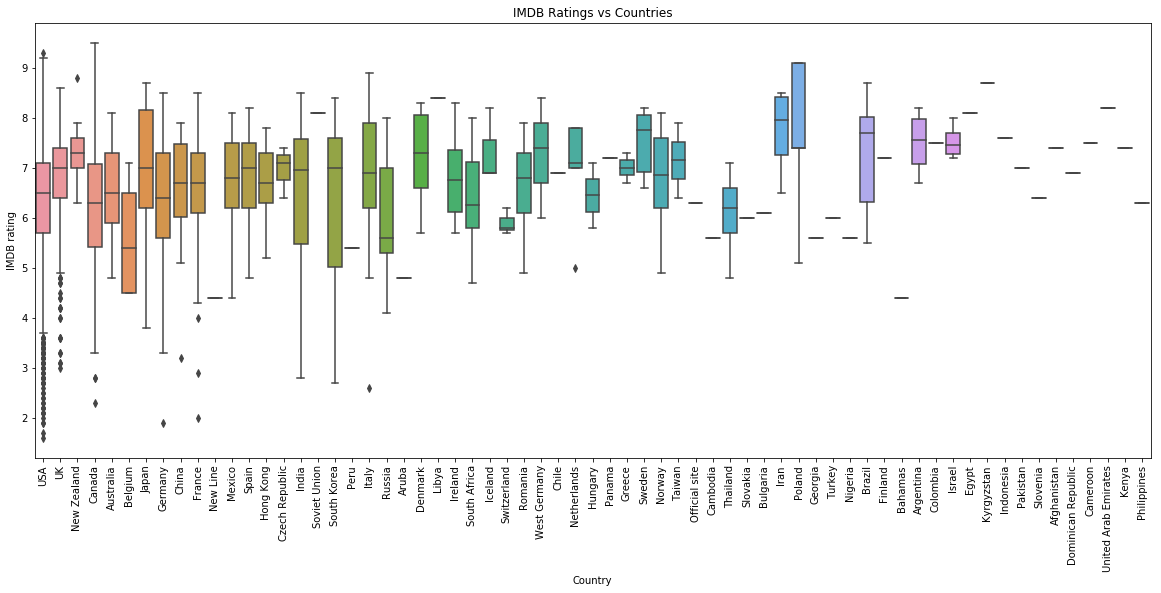

In [6]:
# Set the figure size
plt.figure(figsize=(20,8))
# Rotate the x-axis labels
plt.xticks(rotation=90)
sns.boxplot(x="country", y="imdb_score", data=df)
plt.title('IMDB Ratings vs Countries')
plt.ylabel('IMDB rating')
plt.xlabel('Country')
plt.show()

The median IMDB scores of both US and UK are not the highest among all countries. Although most of the movies produced in the past 100 years are from these two countries as we can see below.

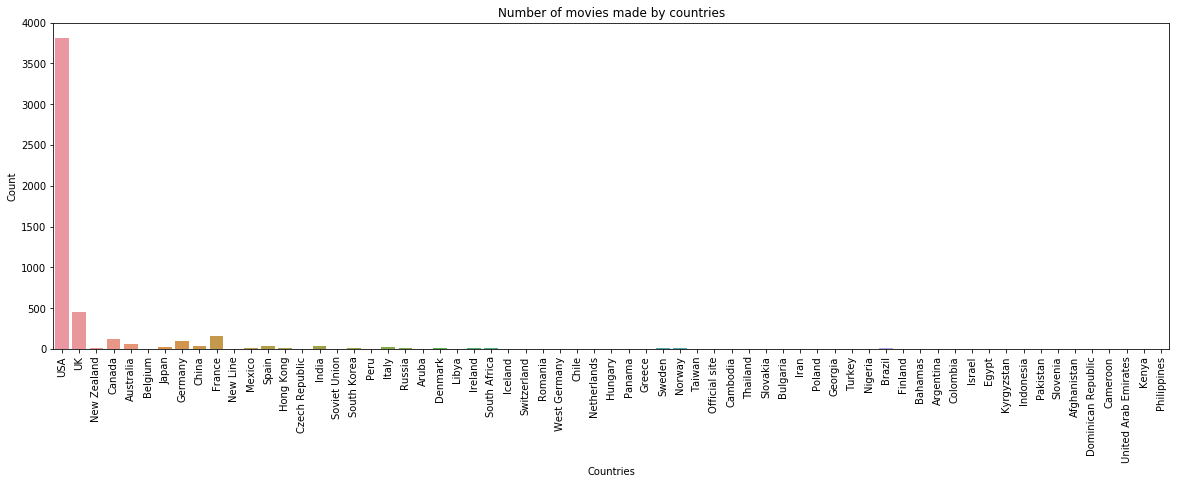

In [7]:
# Set the figure size
plt.figure(figsize=(20,6))
# Rotate the x-axis labels
plt.xticks(rotation=90)
sns.countplot(x = 'country', data = df )
plt.title('Number of movies made by countries') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Countries') # add x-label
plt.show()

It also means that most of the movies made in English as we can see below.

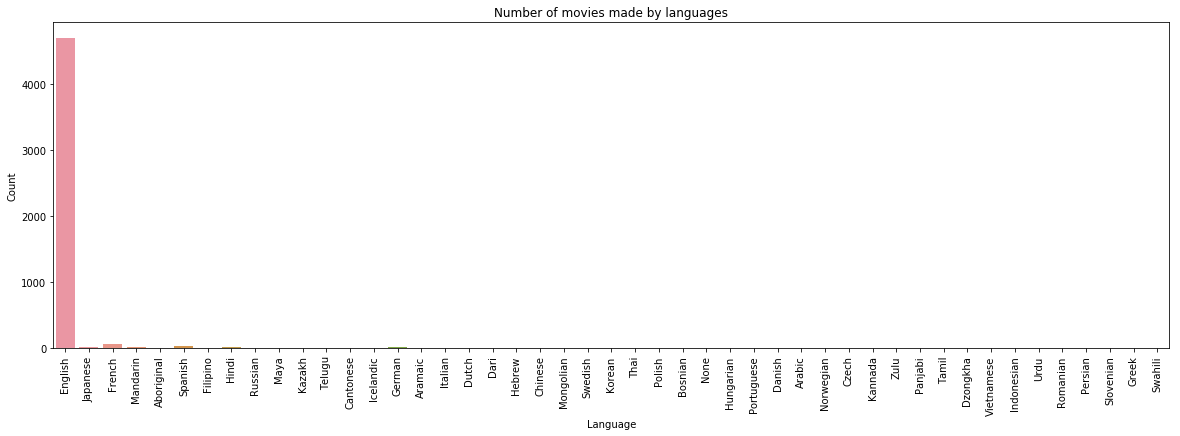

In [8]:
# Set the figure size
plt.figure(figsize=(20,6))
# Rotate the x-axis labels
plt.xticks(rotation=90)
sns.countplot(x = 'language', data = df )
plt.title('Number of movies made by languages') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Language') # add x-label
plt.show()

**Number of Movie Produced by Year**

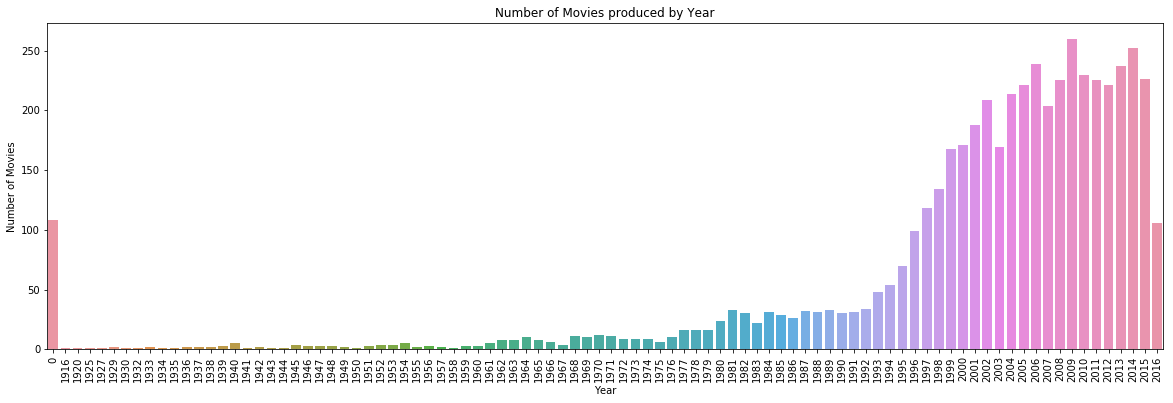

In [9]:
# Set movie year to be integer
df['title_year'] = df['title_year'].fillna(0.0).astype(int)
# Set the figure size
plt.figure(figsize=(20,6))
# Rotate the x-axis labels
plt.xticks(rotation=90)
sns.countplot(x = 'title_year', data = df )
plt.title('Number of Movies produced by Year')
plt.ylabel('Number of Movies')
plt.xlabel('Year')
plt.show()

Number of movies produced have been largely increasing together with the development of filming industry since 1960. 

**IMDB Rating VS Movie Facebook Popularity**

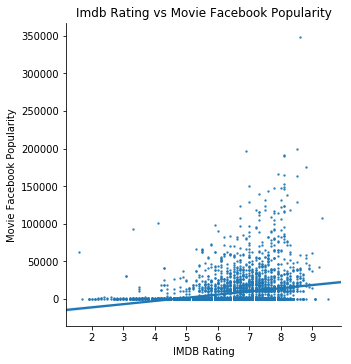

In [10]:
s = sns.lmplot(x='imdb_score', y='movie_facebook_likes',data=df, fit_reg=True,scatter_kws={'s':2})
plt.title('Imdb Rating vs Movie Facebook Popularity')
plt.xlabel('IMDB Rating')
plt.ylabel('Movie Facebook Popularity')
plt.show()

Movies with high facebook likes tend to have good IMDB ratings as we can see the trend. However, some great movies with very high scores have very low facebook popularity.

**IMDB score VS Director Facebook Popularity**

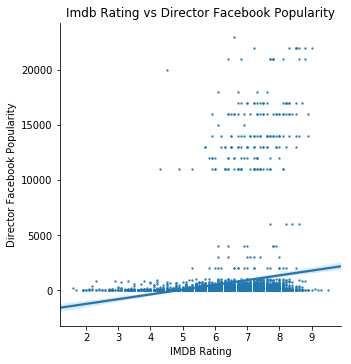

In [11]:
s = sns.lmplot(x='imdb_score', y='director_facebook_likes',data=df, fit_reg=True,scatter_kws={'s':2})
plt.title('Imdb Rating vs Director Facebook Popularity')
plt.xlabel('IMDB Rating')
plt.ylabel('Director Facebook Popularity')
plt.show()

Directors with more facebook popularity generally have higher IMDB scores as we can see the positive trend.

**IMDB score VS top 3 actors/actresses facebook popularity**
<br> <br>
Great actors made great movies. So I plot the graphs of IMDB score vs top 3 actors or actresses facebook likes. Leading actors and actresses tend to have the highest facebook popularity while the second and third have less likes.

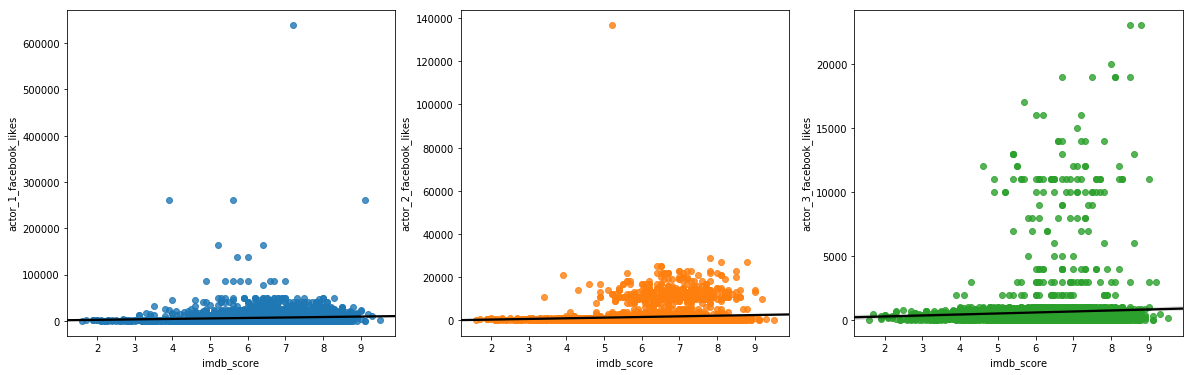

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))
sns.regplot(x='imdb_score', y='actor_1_facebook_likes', data=df, ax=ax1, line_kws={"color": "black"})
sns.regplot(x='imdb_score', y='actor_2_facebook_likes', data=df, ax=ax2, line_kws={"color": "black"})
sns.regplot(x='imdb_score', y='actor_3_facebook_likes', data=df, ax=ax3, line_kws={"color": "black"})


As we can see the trend line almost flat, leading actors or actresses with high facebook popularity does not mean that the movie gets great imdb score.

**Feature Correlation Analysis**
<br> <br>
Choosing 15 continuous variables, I plotted the correlation matrix below.

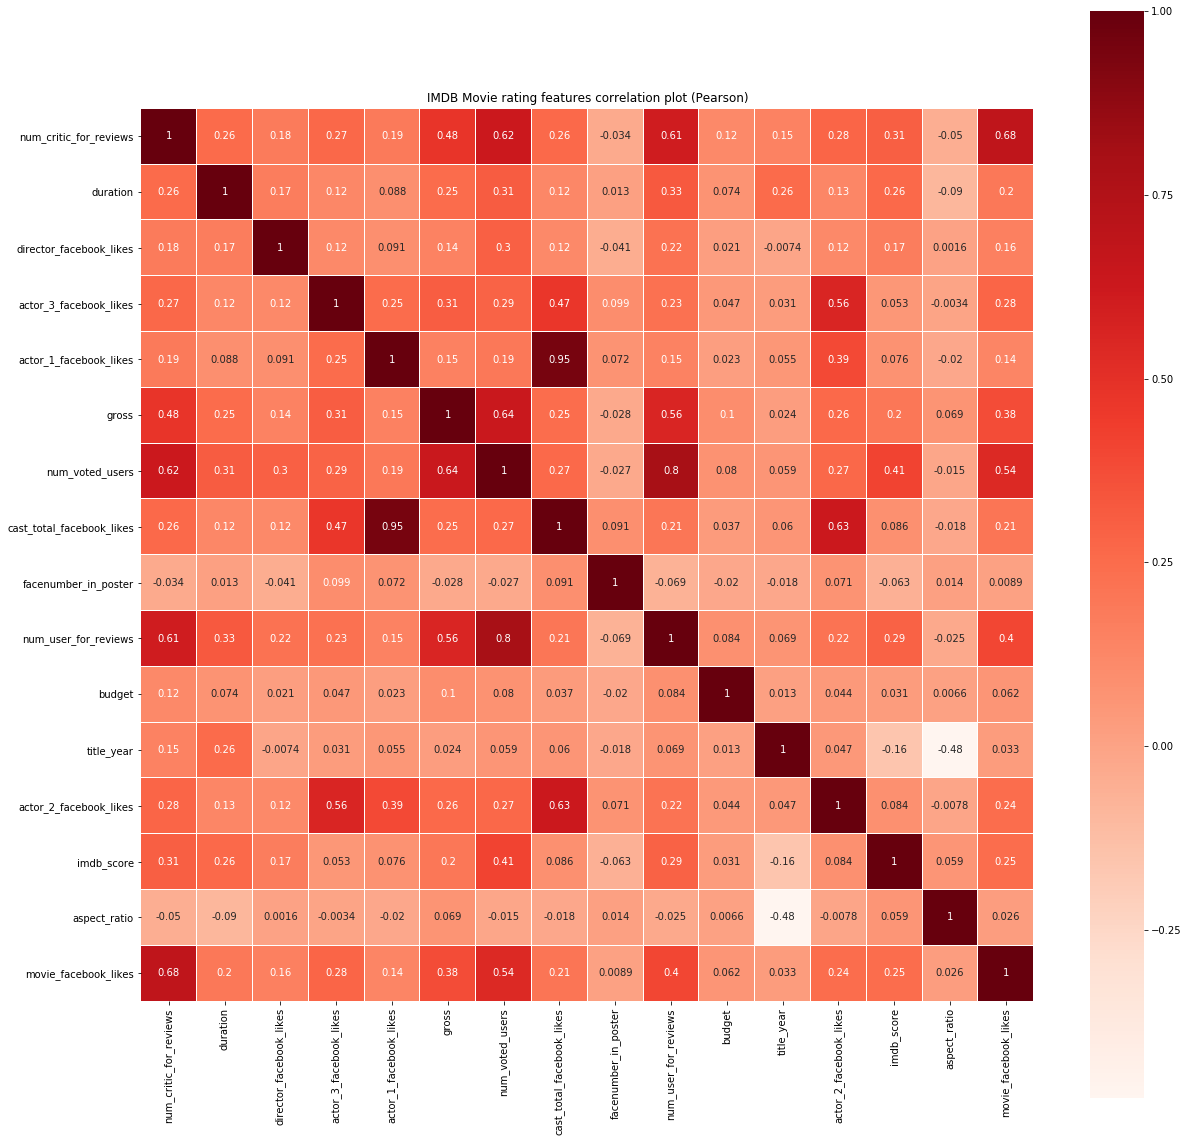

In [13]:
plt.figure(figsize = (20,20))
plt.title('IMDB Movie rating features correlation plot (Pearson)')
corr = df.select_dtypes(include = ['float64', 'int64','int']).corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds",vmax=1,square=True,annot=True)
plt.show()

The matrix give us some insights that:
- The "cast_total_facebook_likes" has a strong positive correlation with the "actor_1_facebook_likes", and has smaller positive correlation with both "actor_2_facebook_likes" and "actor_3_facebook_likes". This is understandable since the leading actor has the overwhelming facebook likes as compared to the second and third actors.
- The "movie_facebook_likes" has relatively large correlation with "num_critic_for_reviews", it means that the popularity of a movie in social network can be greatly affected by the critics.
- The "movie_facebook_likes" has relatively high correlation with the "num_voted_users"
- The movie "gross" has strong positive correlation with the "num_voted_users"
- The "num_critic_for_reviews" has high correlation with both "num_voted_users" and "num_user_for_reviews". It means that movies with more attention from users get more critics.

Also, we get the same results of some pairwise correlation as explored above:
- The "imdb_score" has small positive correlation with the "director_facebook_likes", meaning a popular director does not necessarily mean that his movie will be great.
- The "imdb_score" has very small but positive correlation with the "actor_1_facebook_likes", so high facebook popularity of the leading actor does not necessarily lead to high rating movie. So do supporting actors.
- The "imdb_score" has small and positive correlation with "duration". Long movies tend to have high rating.
- The "imdb_score" has very small negative correlation with "facenumber_in_poster". Perhaps it's not a good idea to have many faces in movie poster.
- The "imdb_score" has almost no correlation with "budget". Money does not necessarily make a movie great.